In [1]:
import numpy as np
import utils
import qiskit

In [2]:
circled_interactions = {(i, (i + 1) % 3): 1 for i in range(3)}

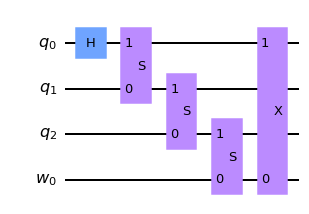

In [4]:
circled_circuit = utils.circled_circuit(3, circled_interactions)
circled_circuit.draw('mpl')

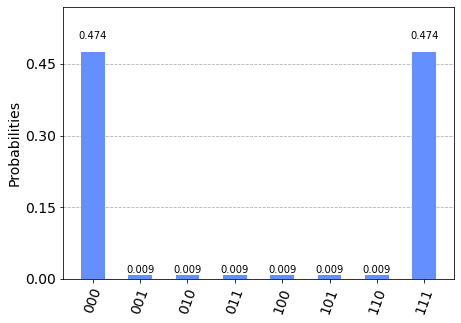

In [5]:
backend = qiskit.Aer.get_backend('statevector_simulator')
job = qiskit.execute(circled_circuit, backend)
pre_result = job.result()
result = utils.process_circled_result(pre_result)
qiskit.visualization.plot_histogram(result)

In [8]:
utils.get_probs_distribution(3, circled_interactions)

,s,Pr[s]
0,"[-1, -1, -1]",0.473957
1,"[-1, -1, 1]",0.008681
2,"[-1, 1, -1]",0.008681
3,"[-1, 1, 1]",0.008681
4,"[1, -1, -1]",0.008681
5,"[1, -1, 1]",0.008681
6,"[1, 1, -1]",0.008681
7,"[1, 1, 1]",0.473957
